In [1]:
import os
import matplotlib.pylab as plt
from glob import glob
import numpy as np

In [2]:
PATH = os.path.abspath('data')

SOURCE_IMAGES = [os.path.join(PATH, "images/innopolis")]

images = []
labels = []

for si in SOURCE_IMAGES:
    images.extend(glob(os.path.join(si, "*.png")))
    labels.extend(glob(os.path.join(si.replace("images/","labels/"), "*.png")))
    
print("Datasets used: {}\n".format(SOURCE_IMAGES))

images.sort()
labels.sort()

print(len(images))
print(len(labels))

Datasets used: ['/home/kenny/Desktop/lanes-segmentation/data/images/innopolis']

633
633


In [3]:
print(np.size(images))
print(np.size(labels))

633
633


In [4]:
from PIL import Image

def get_image(path):
    
    img = Image.open(path)
    img = img.resize((640,256))
    img = np.array(img)
    
    return img

In [5]:
from sklearn.model_selection import train_test_split

test_size = 0.25
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=test_size, random_state=28)

print(len(images_train))
print(len(labels_train))
print(len(images_test))
print(len(labels_test))

474
474
159
159


In [6]:
batch_size = 1

# images_train = images_train[:50]
# images_test = images_test[:4]

In [ ]:
# x_test.shape

In [7]:
from models.Unet import unet
from models.Unet_short import unet_short
from models.DeepLabv3plus import Deeplabv3
from models.deeplabv31p import Deeplabv31p
from segmentation_models import Unet, FPN, Linknet, PSPNet

num_classes = 3

backbone = 'resnet18'

# model = unet(input_size = (256,640,3), n_classes=num_classes)
# model = unet_short(input_size = (256,640,3), n_classes=num_classes)
# model = Deeplabv3(input_shape=(256,640,3), classes=num_classes)
# model = Deeplabv3(input_shape=(256,640,3), classes=num_classes, backbone='xception')

# model = Deeplabv31p(input_shape = (256,640,3), classes = num_classes)

model = Linknet(backbone_name=backbone, input_shape=(256, 640, 3), classes=num_classes, activation='softmax')

print("Model summary:")
model.summary()

Using TensorFlow backend.


Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 256, 640, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 640, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 262, 646, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 320, 64) 9408        zero_padding2d_1[0][0]           
______________________________________________________________________________________________

In [8]:
# model.load_weights('weights/innopolis/unet_short35/2019-01-10 16-36-37.hdf5') #Unet
# model.load_weights('weights/innopolis/unet_short_overfit/2019-01-14 08-12-32.hdf5') #Unet_short overfit

# model.load_weights('weights/innopolis/dlv3pmn/2019-01-11 10-50-31.hdf5') #DeepLabv3plusMobileNet
# model.load_weights('weights/innopolis/dlv3pmn_overfit/2019-01-14 11-50-30.hdf5') #DeepLabv3plusMobileNet Softmax Overfit

# model.load_weights('weights/innopolis/2019-01-17 16-37-45.hdf5') #Deeplabv31p

# model.load_weights('weights/innopolis/2019-01-18 15-13-15.hdf5') #Linknet-DenseNet121

model.load_weights('weights/innopolis/2019-01-21 11-14-12.hdf5') #Linknet-ResNet18

In [ ]:
# import cv2

# img = plt.imread("image3.jpg")
# w, h, _ = img.shape
# ratio = 512. / np.max([w,h])
# resized = cv2.resize(img,(int(ratio*h),int(ratio*w)))
# resized = resized / 127.5 - 1.
# pad_x = int(512 - resized.shape[0])
# resized2 = np.pad(resized,((0,pad_x),(0,0),(0,0)),mode='constant')
# res = model.predict(np.expand_dims(resized2,0))
# labels = np.argmax(res.squeeze(),-1)
# plt.imshow(labels[:-pad_x])

In [ ]:
steps = len(images_test)//batch_size

In [9]:
i = 24

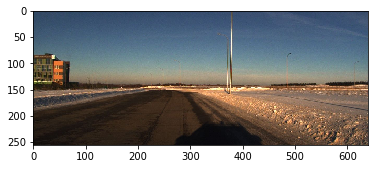

In [10]:
plt.imshow(get_image(images_test[i]))

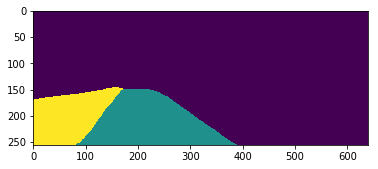

In [13]:
from segmentation_models.backbones import get_preprocessing

i = 29
x = get_image(images_test[i])
x = np.expand_dims(x, axis=0)

# x = np.float32(x/255.)

preprocessing_fn = get_preprocessing(backbone)
x = preprocessing_fn(x)

y_pred = model.predict(x)
out = y_pred.squeeze()
mask = np.argmax(out, axis=-1)
np.unique(mask)
plt.imshow(mask)

In [ ]:
plt.imshow(get_image(images_train[4]))

In [ ]:
y_pred.shape

In [ ]:
y_pred[0,0]

In [ ]:
np.unique(np.argmax(y_pred.squeeze(), axis=-1))

In [ ]:
plt.imshow(np.argmax(y_pred.squeeze(), axis=-1))

In [ ]:
plt.imshow(y_pred.squeeze())

In [ ]:
y_pred[0,0,0]

In [ ]:
y_pred.shape

In [ ]:
sum(sum(np.argmax(y_pred[0], axis=-1)))

In [ ]:
y_pred2 = model.predict(np.expand_dims(get_image(images_test[1]), axis=0))

In [ ]:
y_pred2.shape

In [ ]:
y_pred == y_pred2

In [ ]:
plt.imshow(y_pred[0])

In [ ]:
plt.imshow(get_image(images_test[0]))

In [ ]:
len(images_test)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158


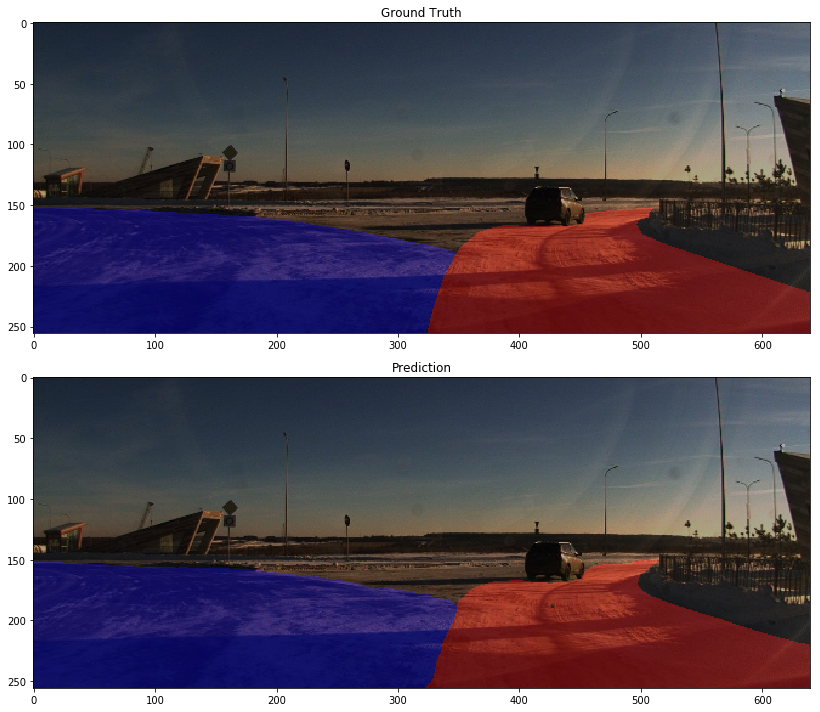

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(15,10)

for i in range(len(images_test)):
    y_pred = model.predict(preprocessing_fn(np.expand_dims(get_image(images_test[i]), axis=0)))
    axes[0].imshow(get_image(images_test[i]))
    axes[0].imshow(colorize(get_image(labels_test[i])), alpha=0.33)
    axes[0].set_title('Ground Truth')
    axes[1].imshow(get_image(images_test[i]))
    axes[1].imshow(colorize(np.argmax(y_pred.squeeze(), axis = -1)), alpha=0.33)
    axes[1].set_title('Prediction')
    print(i)
    fig.tight_layout()
    fig.savefig('results/innopolis/linknet-resnet18_overfit/img{}.png'.format(i))

In [ ]:
# y_pred = model.predict(x_test, batch_size=1, verbose=1)
y_pred = np.load("results/diceonroad.npy")

In [ ]:
y_pred.shape

In [ ]:
np.unique(np.argmax(y_pred, axis = -1))

In [ ]:
len(x_test)

In [14]:
import webcolors

def colorize(mask):
    hex_colors = ['#000000', '#FF0000', '#0000FF']

    rgb_colors = []

    for hex_color in hex_colors:
        rgb_colors.append(webcolors.hex_to_rgb(hex_color))
        
    colors = np.array(rgb_colors)
        
    colorMask = np.zeros([mask.shape[0], mask.shape[1], 3],dtype=np.uint8)
    for r in range(mask.shape[0]):
        for c in range(mask.shape[1]):
            colorMask[r,c,] = colors[mask[r,c]]

    return colorMask

IndexError: index 3 is out of bounds for axis 0 with size 1

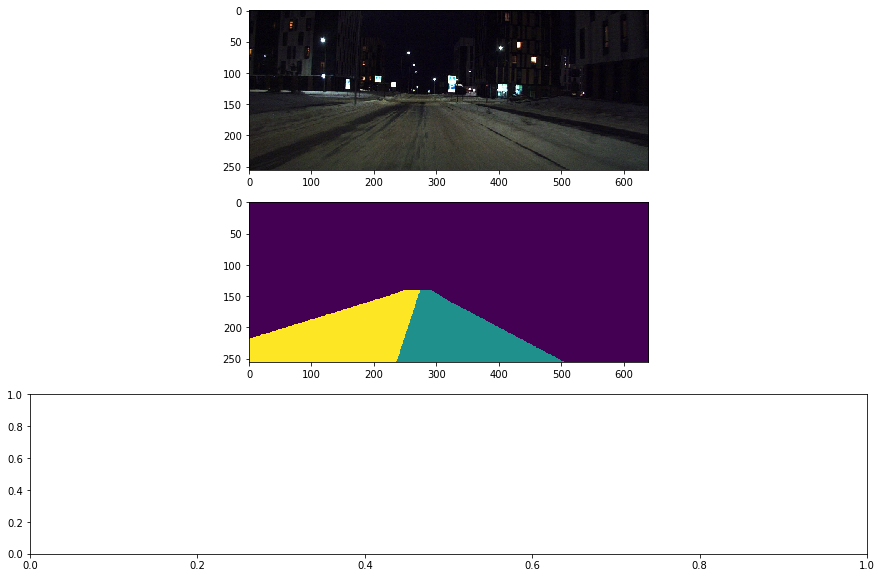

In [15]:
n = 3

fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15,10)
axes[0].imshow(get_image(images_test[n]))
axes[1].imshow(get_image(labels_test[n]))
axes[2].imshow(colorize(np.argmax(y_pred[n], axis = -1)))
fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15,10)
for i in range(len(x_test)):
    axes[0].set_title('RGB Image')
    axes[1].set_title('GT Mask')
    axes[2].set_title('Prediction Mask')
    axes[0].imshow(get_image(images_test[i]))
    axes[1].imshow(colorize(rgbto2(get_label(labels_test[i]))))
    axes[2].imshow(colorize(np.argmax(y_pred[i], axis = -1)))
    fig.tight_layout()
    fig.savefig('results/road/cwplusdice/img{}.png'.format(i))

In [20]:
y = np.argmax(y_pred.squeeze(), axis = -1)

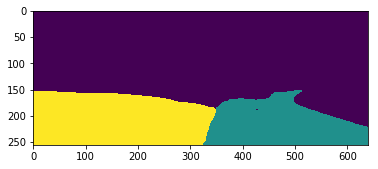

In [23]:
plt.imshow(y)

In [24]:
np.unique(y)

array([0, 1, 2])